In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

In [4]:
from utils.dataset import random_split_train_val

In [6]:
test_dataset = np.loadtxt("data/khasanshin/THRESHOLD_TEST.txt", delimiter=",")
train_dataset = np.loadtxt("data/khasanshin/THRESHOLD_ALL.txt", delimiter=",")

In [7]:
# let`s see to 4-th column
X = train_dataset[:,0:600]
Y = train_dataset[:,600]

X_test = test_dataset[:,0:600]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [8]:
# 4-th column = sum of 1,2,3 columns
x = X_train[1].reshape(4, 150)
np.max(np.sum(x[:3, :], axis=0) - x[-1])

0.010000000000001563

In [10]:
# no need for features linear combination 
X = train_dataset[:,0:450]
Y = train_dataset[:,600]

In [11]:
# Выходной слой с 5 - прямой, боковой, апперкот, уракен, передвижения без ударов
num_classes = 5

# Simple multy layer perceptron

In [12]:
X_test = test_dataset[:,0:450]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

In [13]:
mlp = Sequential([
    Dense(450, activation='sigmoid'),
    Dense(1024, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(5, activation='sigmoid')
])

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
mlp_history = mlp.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32,  verbose=1)

Epoch 1/100
54/54 [==============================] - 1s 10ms/step - loss: 1.6094 - accuracy: 0.2494 - val_loss: 1.2788 - val_accuracy: 0.4811
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 1.1810 - accuracy: 0.5100 - val_loss: 1.0723 - val_accuracy: 0.5896
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.8742 - accuracy: 0.7103 - val_loss: 0.7967 - val_accuracy: 0.7453
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5130 - accuracy: 0.8544 - val_loss: 0.5605 - val_accuracy: 0.8302
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3387 - accuracy: 0.9110 - val_loss: 0.5366 - val_accuracy: 0.8396
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2455 - accuracy: 0.9405 - val_loss: 0.5607 - val_accuracy: 0.8160
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2380 - accuracy: 0.9343 - val_loss: 0.5911 - val_accuracy: 0.8349
Epoch 8/100


54/54 [==============================] - 0s 8ms/step - loss: 4.2718e-04 - accuracy: 1.0000 - val_loss: 0.6261 - val_accuracy: 0.8774
Epoch 59/100
54/54 [==============================] - 0s 8ms/step - loss: 4.1375e-04 - accuracy: 1.0000 - val_loss: 0.6294 - val_accuracy: 0.8774
Epoch 60/100
54/54 [==============================] - 0s 8ms/step - loss: 4.0369e-04 - accuracy: 1.0000 - val_loss: 0.6319 - val_accuracy: 0.8774
Epoch 61/100
54/54 [==============================] - 0s 8ms/step - loss: 3.9192e-04 - accuracy: 1.0000 - val_loss: 0.6344 - val_accuracy: 0.8774
Epoch 62/100
54/54 [==============================] - 0s 8ms/step - loss: 3.6170e-04 - accuracy: 1.0000 - val_loss: 0.6364 - val_accuracy: 0.8774
Epoch 63/100
54/54 [==============================] - 0s 9ms/step - loss: 3.5590e-04 - accuracy: 1.0000 - val_loss: 0.6383 - val_accuracy: 0.8774
Epoch 64/100
54/54 [==============================] - 0s 9ms/step - loss: 3.5202e-04 - accuracy: 1.0000 - val_loss: 0.6408 - val_accuracy

In [15]:
results = mlp.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 3ms/step - loss: 8.6297e-05 - accuracy: 1.0000


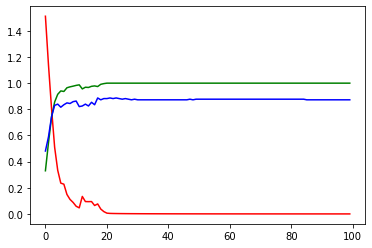

In [16]:
plt.plot(mlp_history.history['loss'],  color='red')
plt.plot(mlp_history.history['accuracy'],  color='green')
plt.plot(mlp_history.history['val_accuracy'], color='blue')

# Convolution Net from Keras tutorial

In [17]:
X_test = test_dataset[:,0:450]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

In [18]:
conv_model = Sequential([
    Input(X_train.shape[1:]),
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    Conv1D(filters=64, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    
    GlobalAveragePooling1D(),
    Dense(num_classes, activation='sigmoid')
])

conv_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
history = conv_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32,  verbose=1)

Epoch 1/100
54/54 [==============================] - 4s 69ms/step - loss: 1.4128 - accuracy: 0.4304 - val_loss: 1.4922 - val_accuracy: 0.2594
Epoch 2/100
54/54 [==============================] - 4s 66ms/step - loss: 1.2016 - accuracy: 0.6123 - val_loss: 1.3827 - val_accuracy: 0.3208
Epoch 3/100
54/54 [==============================] - 4s 66ms/step - loss: 1.0837 - accuracy: 0.6601 - val_loss: 1.4175 - val_accuracy: 0.3679
Epoch 4/100
54/54 [==============================] - 4s 70ms/step - loss: 1.0198 - accuracy: 0.6776 - val_loss: 1.4009 - val_accuracy: 0.3726
Epoch 5/100
54/54 [==============================] - 4s 70ms/step - loss: 0.9647 - accuracy: 0.6737 - val_loss: 1.4127 - val_accuracy: 0.3491
Epoch 6/100
54/54 [==============================] - 4s 73ms/step - loss: 0.9361 - accuracy: 0.6748 - val_loss: 1.1951 - val_accuracy: 0.4151
Epoch 7/100
54/54 [==============================] - 4s 66ms/step - loss: 0.8958 - accuracy: 0.7123 - val_loss: 1.4791 - val_accuracy: 0.4481
Epoch 

KeyboardInterrupt: 

In [237]:
results = conv_model.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.7317


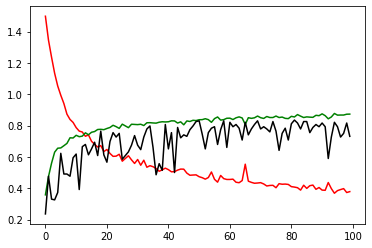

In [236]:
plt.plot(history.history['loss'],  color='red')
plt.plot(history.history['accuracy'],  color='green')
plt.plot(history.history['val_accuracy'], color='black')

# 2D Convolution Net 

In [238]:
X_test = test_dataset[:,0:450]
y_test = test_dataset[:,600]

X_train, y_train, X_val, y_val = random_split_train_val(X, Y, 212)

X_train = X_train.reshape(-1, 3, 150, 1)
X_test = X_test.reshape(-1, 3, 150, 1)
X_val = X_val.reshape(-1, 3, 150, 1)

In [239]:
my_conv_model = Sequential([
    Input(X_train.shape[1:]),
    Conv2D(filters=64, kernel_size=(2, 16)),
    BatchNormalization(),
    ReLU(),
    
    Conv2D(filters=64, kernel_size=2),
    BatchNormalization(),
    ReLU(),
    
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='sigmoid')
])

my_conv_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [240]:
my_conv_history = my_conv_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=16,  verbose=1)

Epoch 1/100
107/107 [==============================] - 1s 6ms/step - loss: 1.1413 - accuracy: 0.6876 - val_loss: 0.8149 - val_accuracy: 0.7547
Epoch 2/100
107/107 [==============================] - 1s 5ms/step - loss: 0.7291 - accuracy: 0.8076 - val_loss: 0.5937 - val_accuracy: 0.8396
Epoch 3/100
107/107 [==============================] - 1s 5ms/step - loss: 0.5524 - accuracy: 0.8524 - val_loss: 0.4694 - val_accuracy: 0.8774
Epoch 4/100
107/107 [==============================] - 1s 5ms/step - loss: 0.4500 - accuracy: 0.8818 - val_loss: 0.4756 - val_accuracy: 0.8349
Epoch 5/100
107/107 [==============================] - 1s 5ms/step - loss: 0.3853 - accuracy: 0.8982 - val_loss: 0.3293 - val_accuracy: 0.8962
Epoch 6/100
107/107 [==============================] - 1s 5ms/step - loss: 0.3496 - accuracy: 0.8976 - val_loss: 0.2485 - val_accuracy: 0.9387
Epoch 7/100
107/107 [==============================] - 1s 5ms/step - loss: 0.3278 - accuracy: 0.9041 - val_loss: 0.2303 - val_accuracy: 0.9245

Epoch 58/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0992 - accuracy: 0.9682 - val_loss: 0.1095 - val_accuracy: 0.9575
Epoch 59/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0871 - accuracy: 0.9694 - val_loss: 0.1036 - val_accuracy: 0.9623
Epoch 60/100
107/107 [==============================] - 1s 5ms/step - loss: 0.1125 - accuracy: 0.9594 - val_loss: 0.0930 - val_accuracy: 0.9575
Epoch 61/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0970 - val_accuracy: 0.9575
Epoch 62/100
107/107 [==============================] - 0s 5ms/step - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.1789 - val_accuracy: 0.9292
Epoch 63/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0876 - accuracy: 0.9718 - val_loss: 0.0819 - val_accuracy: 0.9670
Epoch 64/100
107/107 [==============================] - 1s 5ms/step - loss: 0.0928 - accuracy: 0.9741 - val_loss: 0.1093 - val_accuracy:

In [213]:
results = my_conv_model.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 1.0000


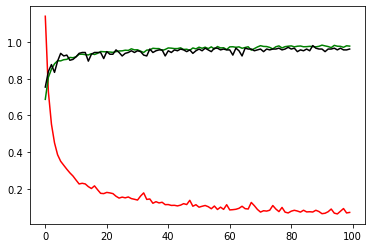

In [241]:
plt.plot(my_conv_history.history['loss'],  color='red')
plt.plot(my_conv_history.history['accuracy'],  color='green')
plt.plot(my_conv_history.history['val_accuracy'], color='black')